# regression, classification, clustering
# linear regression y=mx+c, x-feature and y-label
# logistic regression - two labels
# decision tree - classification
# clustering - Kmeans, SVM etc

Decision trees - multi-class classification
root node, decision node, leaf node

# our goal is to find the decision node

# entropy, information gain
entropy - unwanted/uncertain H
less entropy - more information
information gain - amount of information/how much feature impacts label
-logarithmic (entropy)
# gini index






In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from google.colab import files
import io

col_names = ['pregnancy', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
uploaded_file = files.upload()
pima = pd.read_csv(io.BytesIO(uploaded_file["diabetes.csv"]), header=None, names=col_names)

Saving diabetes.csv to diabetes (3).csv


In [ ]:
#split dataset in features and target variable
# 
feature_cols = ['pregnancy', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols] # Features
y = pima.label # Target variable


X = X.iloc[1:, 0:8]
y = y.iloc[1:, ]

print(X.head())
print(y.head())

  pregnancy glucose  bp skin insulin   bmi pedigree age
1         6     148  72   35       0  33.6    0.627  50
2         1      85  66   29       0  26.6    0.351  31
3         8     183  64    0       0  23.3    0.672  32
4         1      89  66   23      94  28.1    0.167  21
5         0     137  40   35     168  43.1    2.288  33
1    1
2    0
3    1
4    0
5    1
Name: label, dtype: object


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


In [ ]:
criterion : optional (default=”gini”) or Choose attribute selection measure
“gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy
“best” to choose the best split and “random” to choose the best random split

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree
If None, then nodes are expanded

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


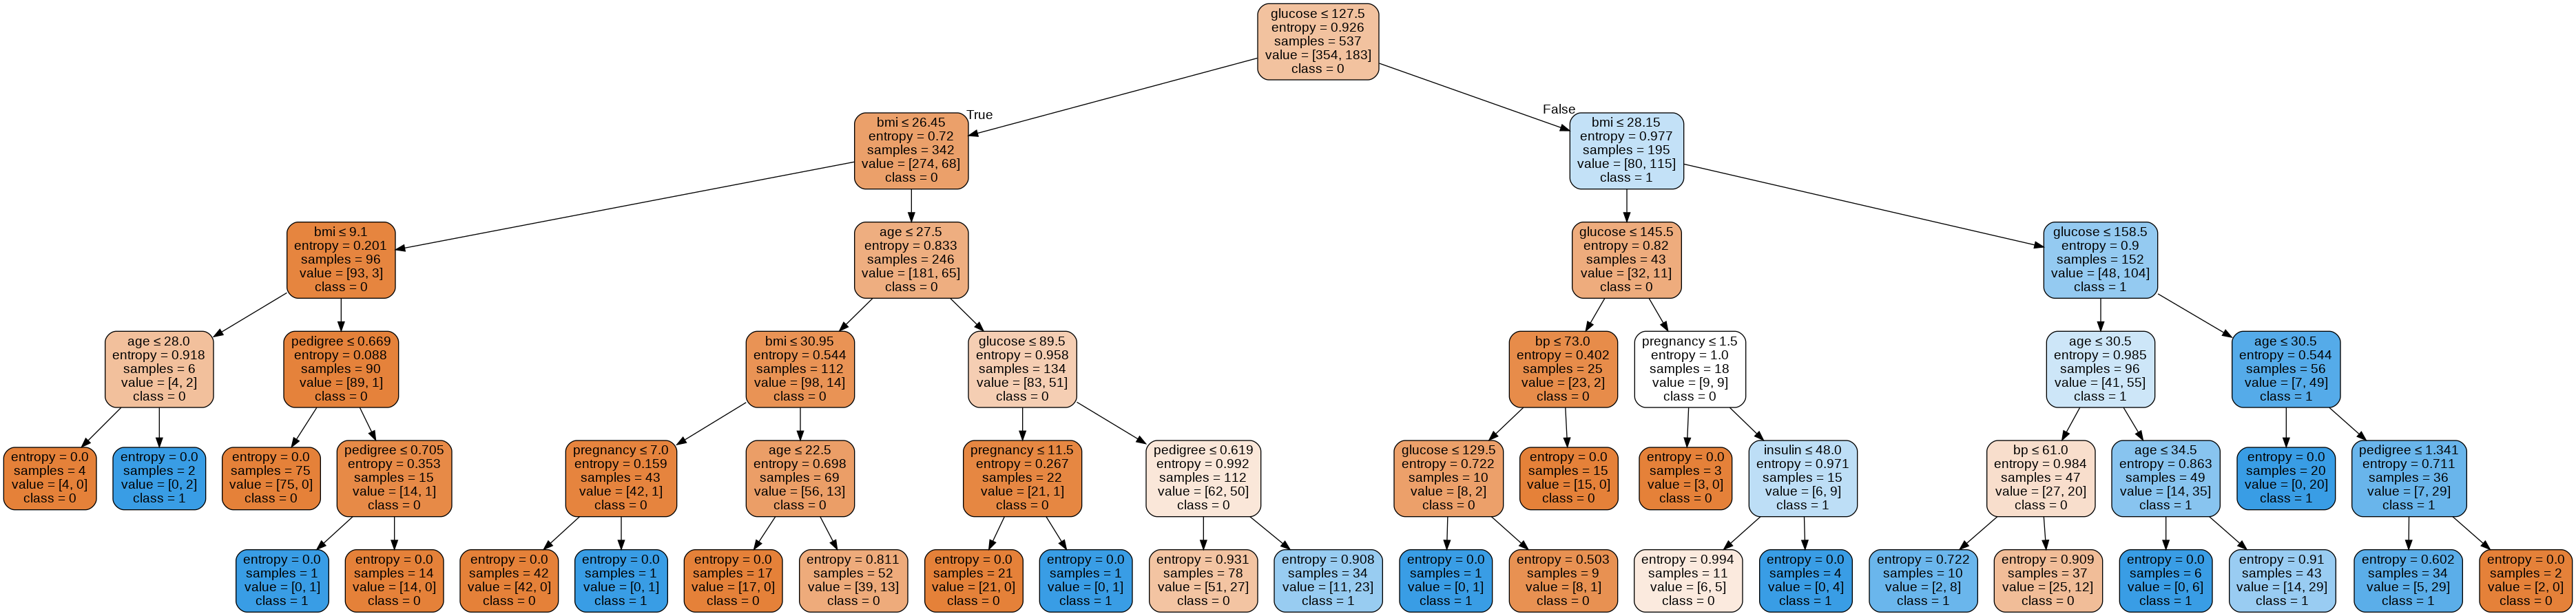

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
# ADVANCED:
BOOTSTRAPING - random selection of dataset
ENSEMBLING - aggregating the decision trees results
RANDOM FOREST - bootstraping and ENSEMBLING

CART

In [ ]:
import numpy as np
import pandas as pd
import io
from google.colab import files

# RANDOM FOREST EXAMPLE - group of decision trees
# importing dataset
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded["bill_authentication.csv"]))

# slicing the feature and label 
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# preprocessing step to split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling - normalize within a uniform range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# random forest classifier and regressor
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Saving bill_authentication.csv to bill_authentication (1).csv
[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091
